#**Compressive Strength Prediction Of Concrete at High Temperature using Regression Techniques**

# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor, AdaBoostRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import max_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time

# Importing Dataset

In [ ]:
data = pd.read_csv("/content/dts.csv")

# EDA

In [ ]:
data.head()

,S. No.,Cement (kg/m3),Water (kg/m3),Sand\r\n(kg/m3),Gravel\r\n(kg/m3),Fly Ash\r\n(kg/m3),Super Plasticizer\r\n(kg/m3),Silica Fume\r\n(kg/m3),Nano Silica\r\n(kg/m3),Temperature\r\n(°C),Compressive Strength (MPa)
0,1,250,123.0,417,1681,0,0.0,0.0,0.0,20,28.16
1,2,250,123.0,417,1681,0,0.0,0.0,0.0,200,23.40
2,3,250,123.0,417,1681,0,0.0,0.0,0.0,400,18.57
3,4,250,123.0,417,1681,0,0.0,0.0,0.0,600,15.26
4,5,250,123.0,417,1681,0,0.0,0.0,0.0,800,8.01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S. No.                      207 non-null    int64  
 1   Cement (kg/m3)              207 non-null    int64  
 2   Water (kg/m3)               207 non-null    float64
 3   Sand
(kg/m3)               207 non-null    int64  
 4   Gravel
(kg/m3)             207 non-null    int64  
 5   Fly Ash
(kg/m3)            207 non-null    int64  
 6   Super Plasticizer
(kg/m3)  207 non-null    float64
 7   Silica Fume
(kg/m3)        207 non-null    float64
 8   Nano Silica
(kg/m3)        207 non-null    float64
 9   Temperature
(°C)           207 non-null    int64  
 10  Compressive Strength (MPa)  207 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 17.9 KB


In [ ]:
data.isnull().sum()

S. No.                          0
Cement (kg/m3)                  0
Water (kg/m3)                   0
Sand\r\n(kg/m3)                 0
Gravel\r\n(kg/m3)               0
Fly Ash\r\n(kg/m3)              0
Super Plasticizer\r\n(kg/m3)    0
Silica Fume\r\n(kg/m3)          0
Nano Silica\r\n(kg/m3)          0
Temperature\r\n(°C)             0
Compressive Strength (MPa)      0
dtype: int64

In [ ]:
data.describe()

,S. No.,Cement (kg/m3),Water (kg/m3),Sand\r\n(kg/m3),Gravel\r\n(kg/m3),Fly Ash\r\n(kg/m3),Super Plasticizer\r\n(kg/m3),Silica Fume\r\n(kg/m3),Nano Silica\r\n(kg/m3),Temperature\r\n(°C),Compressive Strength (MPa)
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,104.000000,437.685990,182.921739,610.130435,1052.125604,12.652174,8.580676,29.316908,1.739130,354.521739,49.311256
std,59.899917,95.490928,59.904761,317.390723,309.412242,33.072072,7.597030,37.085716,5.248168,287.650996,25.170305
min,1.000000,250.000000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.000000
25%,52.500000,390.000000,149.000000,615.000000,1016.000000,0.000000,2.900000,0.000000,0.000000,100.000000,28.750000
50%,104.000000,442.000000,154.000000,689.000000,1110.000000,0.000000,6.000000,7.500000,0.000000,300.000000,46.500000
75%,155.500000,500.000000,186.000000,709.000000,1168.000000,0.000000,15.000000,50.000000,0.000000,600.000000,68.995000
max,207.000000,786.000000,385.000000,1345.000000,1681.000000,150.000000,25.900000,150.000000,22.500000,1000.000000,133.600000


In [ ]:
data = data.drop(['S. No.'], axis = 1)

In [ ]:
data

,Cement (kg/m3),Water (kg/m3),Sand\r\n(kg/m3),Gravel\r\n(kg/m3),Fly Ash\r\n(kg/m3),Super Plasticizer\r\n(kg/m3),Silica Fume\r\n(kg/m3),Nano Silica\r\n(kg/m3),Temperature\r\n(°C),Compressive Strength (MPa)
0,250,123.0,417,1681,0,0.0,0.0,0.0,20,28.16
1,250,123.0,417,1681,0,0.0,0.0,0.0,200,23.40
2,250,123.0,417,1681,0,0.0,0.0,0.0,400,18.57
3,250,123.0,417,1681,0,0.0,0.0,0.0,600,15.26
4,250,123.0,417,1681,0,0.0,0.0,0.0,800,8.01
...,...,...,...,...,...,...,...,...,...,...
202,441,164.0,653,1115,0,2.9,28.0,0.0,20,73.90
203,495,149.0,615,1168,0,1.9,0.0,0.0,100,57.60
204,465,149.0,615,1168,0,3.1,30.0,0.0,200,69.00
205,450,149.0,615,1168,0,3.7,45.0,0.0,300,57.90


# Data visualization

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 13 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 13 missing from current font.



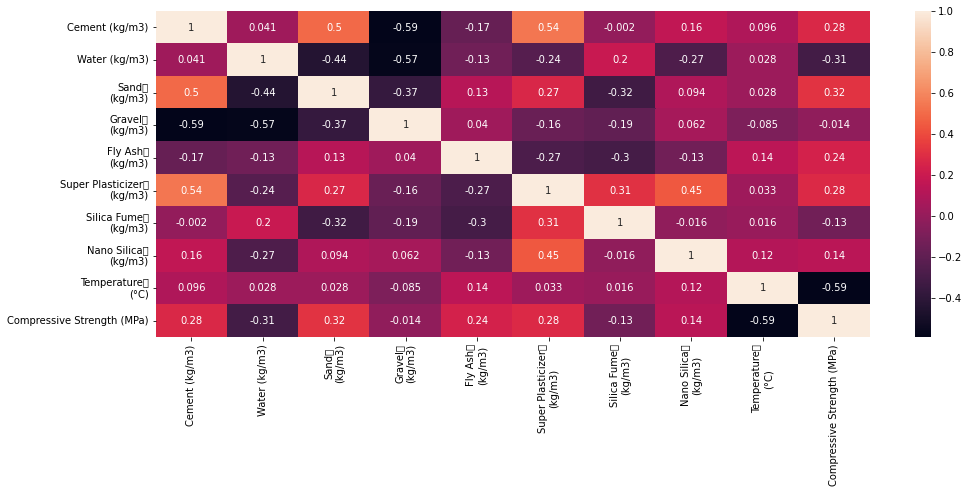

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr(), annot=True)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 13 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 13 missing from current font.



/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 13 missing from current font.



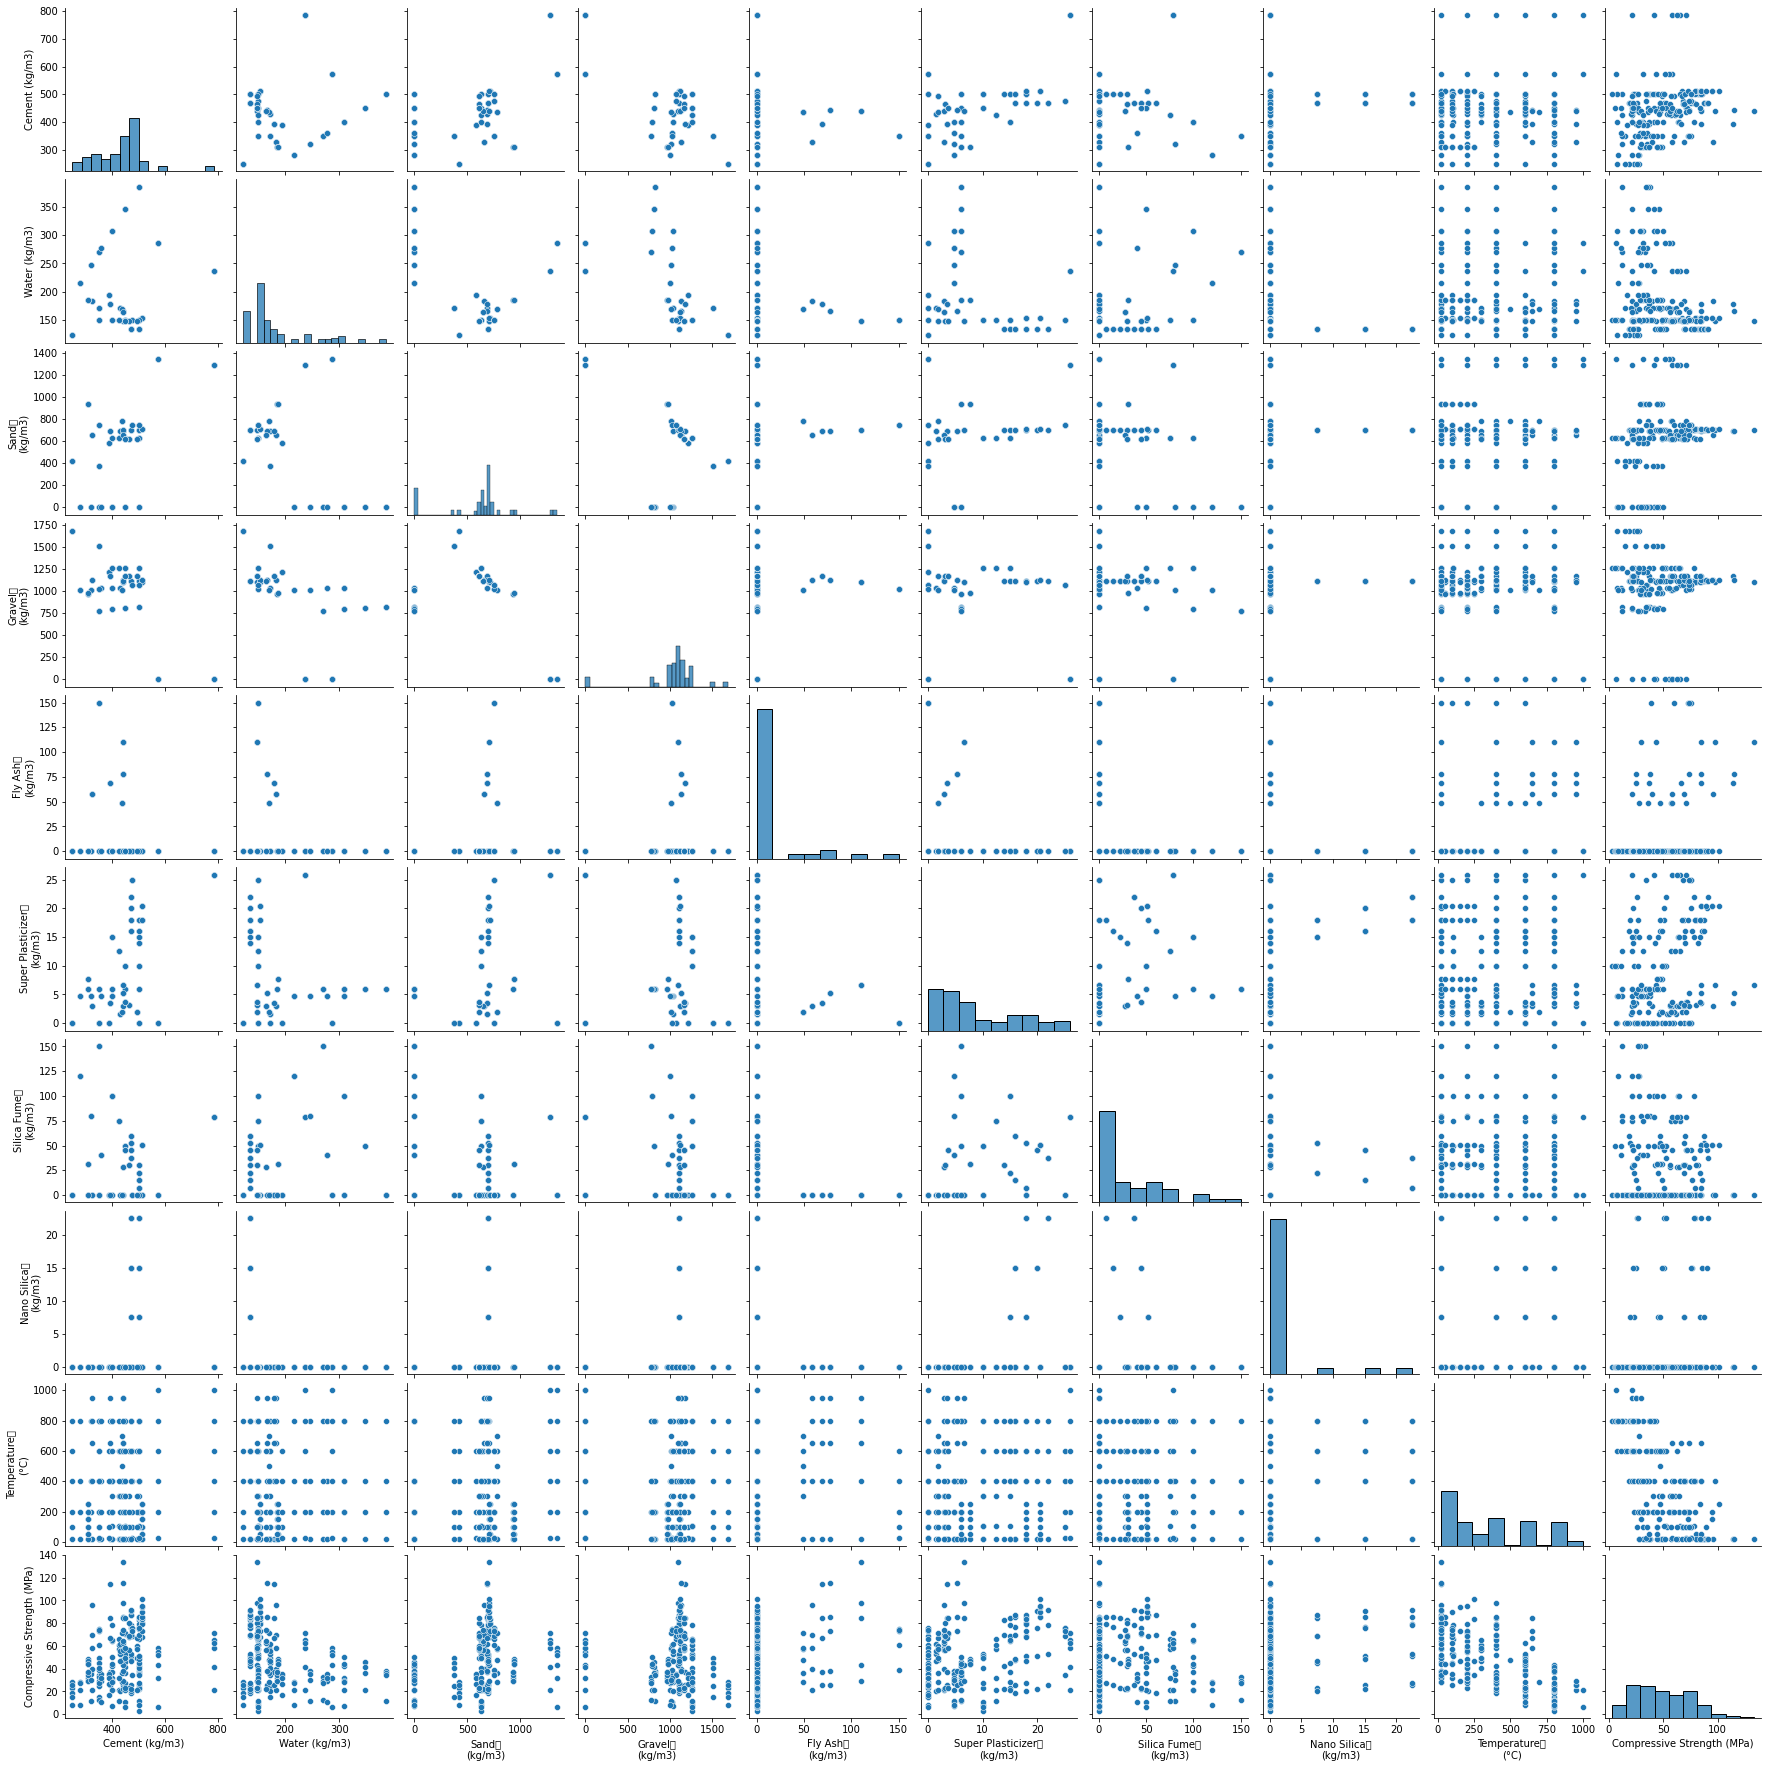

In [ ]:
sns.pairplot(data)

In [ ]:
histogram=px.histogram(data_frame=data,x="Compressive Strength (MPa)",nbins=100)
histogram.show()

In [ ]:
histogram=px.histogram(data_frame=data,x="Temperature\r\n(°C)",nbins=100)
histogram.show()

# Model Building

In [ ]:
X = data.drop(['Compressive Strength (MPa)'], axis=1)
y = data['Compressive Strength (MPa)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((165, 9), (42, 9), (165,), (42,))

# **Model accessing**

In [ ]:
X=data.drop(columns='Compressive Strength (MPa)')
Y=data[['Compressive Strength (MPa)']]

In [ ]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
lr=LinearRegression()
rf=RandomForestRegressor()
sv=SVR()
dt=DecisionTreeRegressor()
gboost=GradientBoostingRegressor()
bagging=BaggingRegressor()
adboost=AdaBoostRegressor()
knn=KNeighborsRegressor()
etr=ExtraTreesRegressor()

In [ ]:
algo=[lr,rf,sv,dt,gboost,bagging,adboost,knn,etr]
model=[]
times=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algo)):
    algo[i].fit(x_train,y_train)
    accuracy_train.append(algo[i].score(x_train,y_train))
    accuracy_test.append(algo[i].score(x_test,y_test))
    model.append(algo[i])
    #start_time = time.time()
    #end_time = time.time()
    #print(end_time - start_time)
    #times.append(end_time - start_time)
mod=pd.DataFrame([model,accuracy_train,accuracy_test]).T
mod.columns=['model','score_train','score_test']
mod

<ipython-input-69-001418c9fea1>:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was pas

,model,score_train,score_test
0,LinearRegression(),0.720147,0.695081
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.981706,0.927851
2,SVR(),0.31595,0.224416
3,DecisionTreeRegressor(),1.0,0.851857
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.986163,0.948399
5,(DecisionTreeRegressor(random_state=1310692482...,0.982587,0.928675
6,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.909328,0.87573
7,KNeighborsRegressor(),0.901696,0.84925
8,"(ExtraTreeRegressor(random_state=465322211), E...",1.0,0.934488


In [ ]:
#algo=[LinearRegression(),RandomForestRegressor(),SVR(),DecisionTreeRegressor(),
     #GradientBoostingRegressor(), BaggingRegressor(),AdaBoostRegressor(),KNeighborsRegressor(),ExtraTreesRegressor()]

In [ ]:
def prepare_model(algorithm, X_train, y_train):

    model = Pipeline(steps=[
        ('algorithm', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [ ]:
names = []
times = []
mses = []
mae = []
r2=[]
sdr = []

for algorithm in algo:
    name = type(algorithm).__name__
    names.append(name)
    print(name)
    #start_time = time.time()
    #print(start_time)
    start=time.process_time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_test)
    end=time.process_time()
    print("End_time: ",end)
    print("Start_time: ",start)
    #print(start)
    times= (end- start)
    print(times)
    mses.append(mean_squared_error(y_test, pred))
    mae.append(mean_absolute_error(y_test, pred))
    r2.append(r2_score(y_test, pred))
    sdr.append(explained_variance_score(y_test, pred))

LinearRegression
End_time:  110.612823234
Start_time:  110.602516913
0.010306321000001617
RandomForestRegressor
End_time:  110.799316231
Start_time:  110.624045031
0.17527120000001162
SVR

/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




End_time:  110.824851502
Start_time:  110.808091962
0.016759539999995354
DecisionTreeRegressor
End_time:  110.84490787
Start_time:  110.834806619
0.010101250999994704
GradientBoostingRegressor
End_time:  110.89994691
Start_time:  110.850602109
0.04934480100000371
BaggingRegressor
End_time:  110.936663028
Start_time:  110.909330532
0.02733249599999965
AdaBoostRegressor
End_time:  110.988028984
Start_time:  110.947560742
0.040468242000002874
KNeighborsRegressor
End_time:  111.004184851
Start_time:  110.995551212
0.008633639000009907
ExtraTreesRegressor


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



End_time:  111.133132965
Start_time:  111.012502801
0.12063016400000492


In [ ]:
results_dict = {'Algorithm': names, 'MSE': mses, 'MAE': mae,'R2Score': r2}
pd.DataFrame(results_dict)

,Algorithm,MSE,MAE,R2Score
0,LinearRegression,791.886185,23.280392,-0.180774
1,RandomForestRegressor,831.701055,22.959795,-0.240142
2,SVR,764.679675,22.299276,-0.140207
3,DecisionTreeRegressor,1287.949688,29.262143,-0.920449
4,GradientBoostingRegressor,810.658905,23.113515,-0.208766
5,BaggingRegressor,815.428369,21.091595,-0.215877
6,AdaBoostRegressor,638.667506,20.574175,0.047689
7,KNeighborsRegressor,867.505930,23.202429,-0.293530
8,ExtraTreesRegressor,872.574463,23.540786,-0.301087


In [ ]:
#start=time.process_time()
#end=time.process_time()
#times.append(end-start)

In [ ]:
"""
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
def relative_root_mean_squared_error(true, pred):
    num = np.sum(np.square(true - pred))
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss

m = mean_absolute_percentage_error(y_test, y_pred)
e = mean_squared_error(y_test, y_pred)
s = relative_root_mean_squared_error(y_test, y_pred)
rsr = explained_variance_score(y_test, y_pred)
print('R2 Score - ',r)
print('Root mean square error - ', e)
print('Mean absolute percentage error -', m)
print('Relative root Mean square error - ', s)
print('Standard deviation ratio -  ', rsr)
"""

"\nfrom sklearn.metrics import r2_score\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.metrics import mean_absolute_percentage_error\nfrom sklearn.metrics import explained_variance_score\ndef relative_root_mean_squared_error(true, pred):\n    num = np.sum(np.square(true - pred))\n    den = np.sum(np.square(pred))\n    squared_error = num/den\n    rrmse_loss = np.sqrt(squared_error)\n    return rrmse_loss\n\nm = mean_absolute_percentage_error(y_test, y_pred)\ne = mean_squared_error(y_test, y_pred)\ns = relative_root_mean_squared_error(y_test, y_pred)\nrsr = explained_variance_score(y_test, y_pred)\nprint('R2 Score - ',r)\nprint('Root mean square error - ', e)\nprint('Mean absolute percentage error -', m)\nprint('Relative root Mean square error - ', s)\nprint('Standard deviation ratio -  ', rsr)\n"